In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# Import dataset
energy_dataset = pd.read_csv("archive/2016-building-energy-benchmarking.csv")

# Convert to pandas DataFrame
energy_df = pd.DataFrame(energy_dataset)

In [109]:
# Inspect the data
energy_df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


<AxesSubplot:>

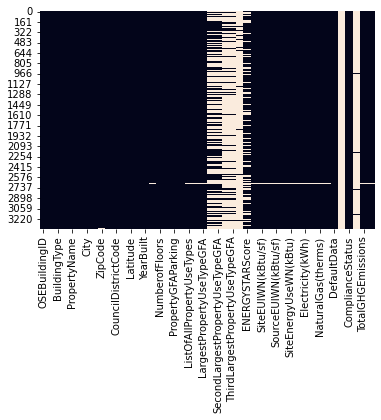

In [110]:
# Visualise null values
sns.heatmap(energy_df.isnull(), cbar=False)

In [111]:
# Find % null values
energy_df.isnull().sum()*100/len(energy_df)

OSEBuildingID                        0.000000
DataYear                             0.000000
BuildingType                         0.000000
PrimaryPropertyType                  0.000000
PropertyName                         0.000000
Address                              0.000000
City                                 0.000000
State                                0.000000
ZipCode                              0.473934
TaxParcelIdentificationNumber        0.000000
CouncilDistrictCode                  0.000000
Neighborhood                         0.000000
Latitude                             0.000000
Longitude                            0.000000
YearBuilt                            0.000000
NumberofBuildings                    0.236967
NumberofFloors                       0.000000
PropertyGFATotal                     0.000000
PropertyGFAParking                   0.000000
PropertyGFABuilding(s)               0.000000
ListOfAllPropertyUseTypes            0.266588
LargestPropertyUseType            

In [112]:
# Drop columns with >75% missing values
nonull_df = energy_df.dropna(thresh=energy_df.shape[0]*0.75,how='all',axis=1)

In [113]:
# Inspect data
nonull_df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01,2.88


In [114]:
# Four columns with low utility for the analysis (common sense):
# 1. PropertyName
# 2. Address (street names are arbitrary, although city, state and zipcode are useful)
# 3. DefaultData
# 4. ComplianceStatus

utility_df = nonull_df.drop(['PropertyName', 'Address', 'DefaultData', 'ComplianceStatus'], axis=1)
utility_df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,...,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83
1,2,2016,NonResidential,Hotel,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,...,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86
2,3,2016,NonResidential,Hotel,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,...,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19
3,5,2016,NonResidential,Hotel,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,...,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67
4,8,2016,NonResidential,Hotel,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,...,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88


In [115]:
# We want to simplify the dataset down further to key components 
# for the model to train on and for the user to use as inputs.
# In line with this key features to include are:
# INPUT/TRAINING FEATURES
# 1. DataYear
# 2. BuildingType
# 3. PrimaryPropertyType
# 4. City
# 5. State
# 6. ZipCode
# 7. CouncilDistrictCode
# 8. Neighborhood
# 9. Latitude
# 10. Longitude
# 11. YearBuilt
# 12. NumberofFloors
# 13. PropertyGFABuilding(s)
# TARGET FEATURE
# 14. Electricity(kWh)

selected_columns = ['DataYear', 'BuildingType', 'PrimaryPropertyType', 
                   'City', 'State', 'ZipCode', 'CouncilDistrictCode',
                   'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
                   'NumberofFloors', 'PropertyGFABuilding(s)','Electricity(kWh)']


simple_df = utility_df.filter(items=selected_columns)

In [116]:
# Inspect the new dataset
# len(simple_df.columns)
simple_df.head()

,DataYear,BuildingType,PrimaryPropertyType,City,State,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFABuilding(s),Electricity(kWh)
0,2016,NonResidential,Hotel,Seattle,WA,98101.0,7,DOWNTOWN,47.61220,-122.33799,1927,12,88434,1.156514e+06
1,2016,NonResidential,Hotel,Seattle,WA,98101.0,7,DOWNTOWN,47.61317,-122.33393,1996,11,88502,9.504252e+05
2,2016,NonResidential,Hotel,Seattle,WA,98101.0,7,DOWNTOWN,47.61393,-122.33810,1969,41,759392,1.451544e+07
3,2016,NonResidential,Hotel,Seattle,WA,98101.0,7,DOWNTOWN,47.61412,-122.33664,1926,10,61320,8.115253e+05
4,2016,NonResidential,Hotel,Seattle,WA,98121.0,7,DOWNTOWN,47.61375,-122.34047,1980,18,113580,1.573449e+06


<AxesSubplot:>

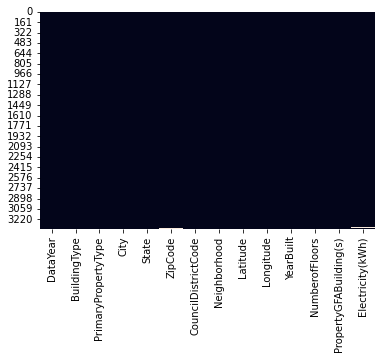

In [117]:
# Visualise missing data on updated dataset
sns.heatmap(simple_df.isnull(), cbar=False)

In [118]:
# The plot shows that the proportion of missing values in the updated dataset is very low
# This means that dropping these rows will not reduce the dataset by a significant amount
simple_df.isnull().sum()*100/len(energy_df)

DataYear                  0.000000
BuildingType              0.000000
PrimaryPropertyType       0.000000
City                      0.000000
State                     0.000000
ZipCode                   0.473934
CouncilDistrictCode       0.000000
Neighborhood              0.000000
Latitude                  0.000000
Longitude                 0.000000
YearBuilt                 0.000000
NumberofFloors            0.000000
PropertyGFABuilding(s)    0.000000
Electricity(kWh)          0.266588
dtype: float64

In [119]:
# Drop na rows
clean_df = simple_df.dropna()

In [120]:
# Export cleaned dataset to csv for exploratory analysis
clean_df.to_csv('cleaned_dataset.csv', index=False)